# One-dimensional harmonic oscillator quantum dot subject to an intense laser field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from tdhf import HartreeFock
from quantum_systems import OneDimensionalHarmonicOscillator
from quantum_systems.time_evolution_operators import LaserField
from coupled_cluster.ccd import OATDCCD
from coupled_cluster.integrators import GaussIntegrator

In [2]:
class LaserPulse:

    def __init__(self, t_0=0, t_final=10, omega=8, strength=1):
        self.t_0 = t_0
        self.t_final = t_final
        self.omega = omega
        self.strength = strength

    def __call__(self, t):
        return self.strength * np.sin(self.omega * t)

In [3]:
n = 2
l = 18

radius = 10
num_grid_points = 401
omega = 0.25
mass = 1

odho = OneDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
odho.setup_system()

hf = HartreeFock(odho, verbose=True)
C = hf.scf(tolerance=1e-6)
odho.change_basis(C)

HF converged to given precision in 21 iterations
Ehf: (1.1795776135218747+0j)


In [4]:
polarization_vector = np.zeros(1)
polarization_vector[0] = 1

laser = LaserField(
    LaserPulse(omega=8*omega, strength=1),
    polarization_vector=polarization_vector
)

odho.set_time_evolution_operator(laser)

In [5]:
cc_kwargs = dict(verbose=True)
theta_t = 0.2
theta_l = 0.4
tol = 1e-4

integrator = GaussIntegrator(np=np, eps=1e-10)
oatdccd = OATDCCD(odho, np=np, integrator=integrator, **cc_kwargs)

t_kwargs = dict(theta=theta_t, tol=tol)
l_kwargs = dict(theta=theta_l, tol=tol)

oatdccd.compute_ground_state(t_kwargs=t_kwargs, l_kwargs=l_kwargs)
print("Ground state CCD energy: {0}".format(oatdccd.compute_ground_state_energy()))

Iteration: 0	Diff (t): [100]
Iteration: 1	Diff (t): [0.2534122642901905]
Iteration: 2	Diff (t): [0.21894315612208612]
Iteration: 3	Diff (t): [0.14034049475185706]
Iteration: 4	Diff (t): [0.1273582866611876]
Iteration: 5	Diff (t): [0.09831452819436942]
Iteration: 6	Diff (t): [0.08678765570189945]
Iteration: 7	Diff (t): [0.0717511769552901]
Iteration: 8	Diff (t): [0.06263693972980339]
Iteration: 9	Diff (t): [0.05314596686420109]
Iteration: 10	Diff (t): [0.04621606291288305]
Iteration: 11	Diff (t): [0.0396128968549907]
Iteration: 12	Diff (t): [0.034392703212277664]
Iteration: 13	Diff (t): [0.029604141632582237]
Iteration: 14	Diff (t): [0.02567994434846471]
Iteration: 15	Diff (t): [0.022148059309760437]
Iteration: 16	Diff (t): [0.019200202548076695]
Iteration: 17	Diff (t): [0.016576700983541803]
Iteration: 18	Diff (t): [0.01436353674457902]
Iteration: 19	Diff (t): [0.012408574645839887]
Iteration: 20	Diff (t): [0.010747935147217613]
Iteration: 21	Diff (t): [0.009288828058520882]
Iteration:

In [6]:
rho = oatdccd.compute_ground_state_particle_density()

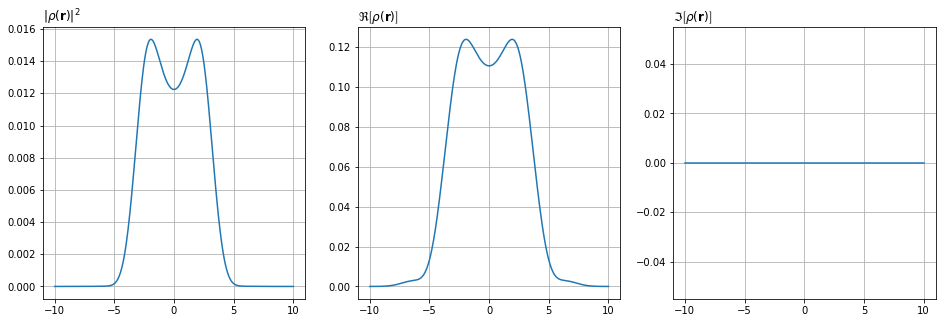

In [7]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.plot(odho.grid, np.abs(rho * rho.conj()))
plt.grid()

ax = fig.add_subplot(1, 3, 2)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.plot(odho.grid, rho.real)
plt.grid()

ax = fig.add_subplot(1, 3, 3)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.plot(odho.grid, rho.imag)
plt.grid()

plt.show()

In [8]:
oatdccd.set_initial_conditions()

In [9]:
dt = 1e-2
t_start = 0
t_end = 14

num_timesteps = int((t_end - t_start) / dt + 1)
print(f"Number of timesteps to perform: {num_timesteps}")

time_points = np.linspace(t_start, t_end, num_timesteps)

Number of timesteps to perform: 1401


In [10]:
psi_overlap = np.zeros(num_timesteps, dtype=np.complex128)
td_energies = np.zeros(num_timesteps, dtype=np.complex128)

psi_overlap[0] = oatdccd.compute_time_dependent_overlap()
td_energies[0] = oatdccd.compute_energy()

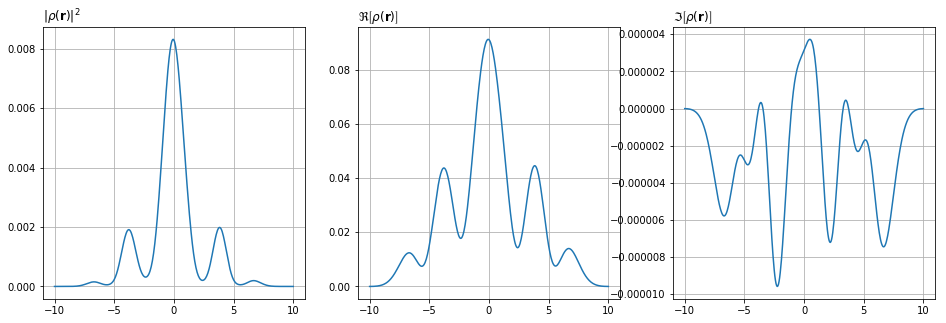

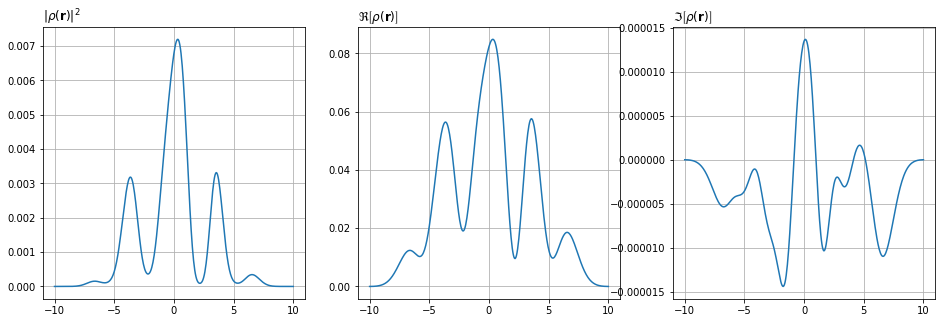

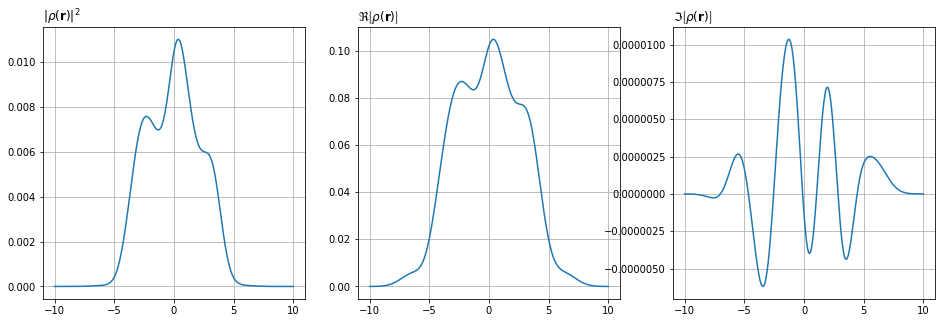

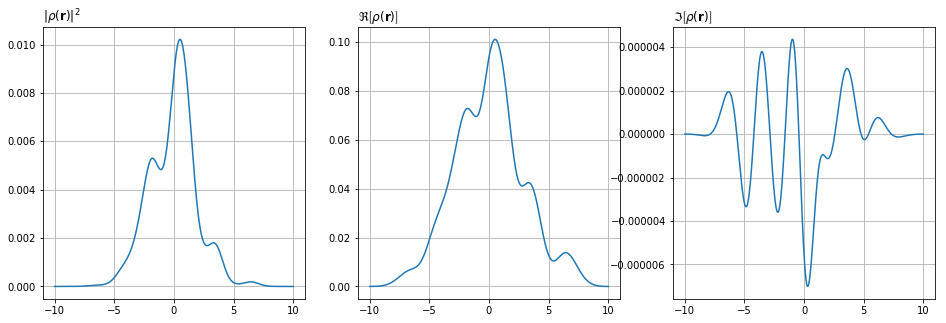

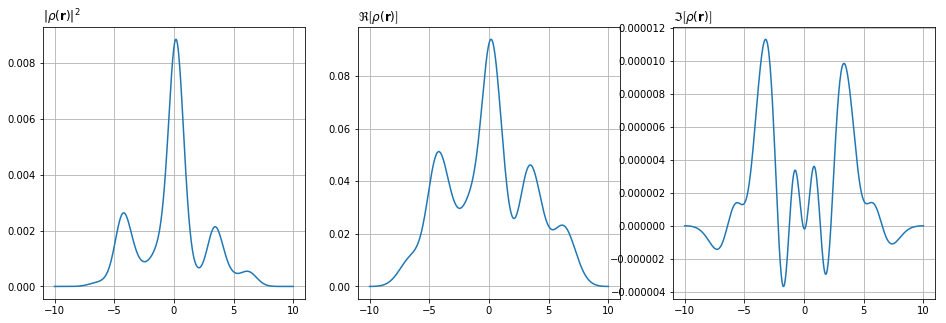

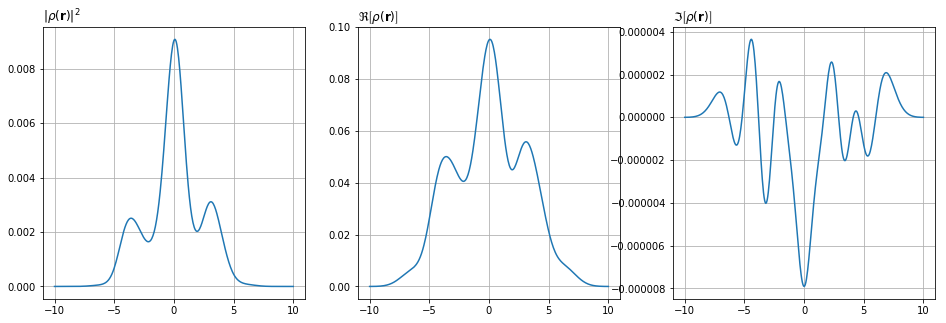

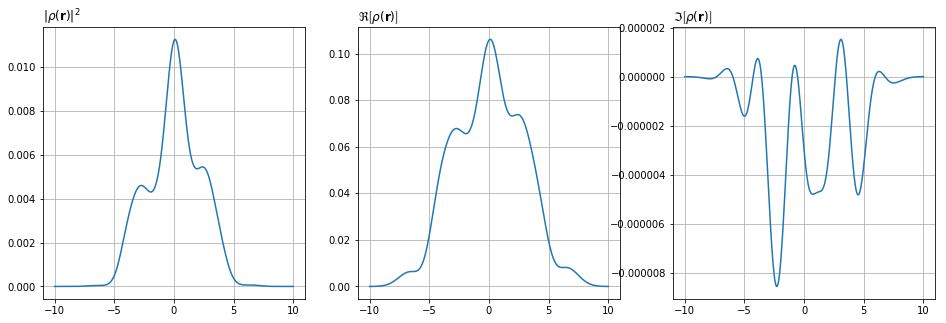

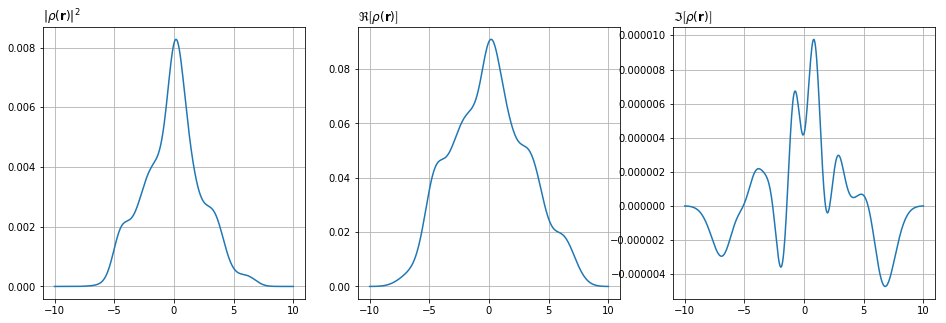

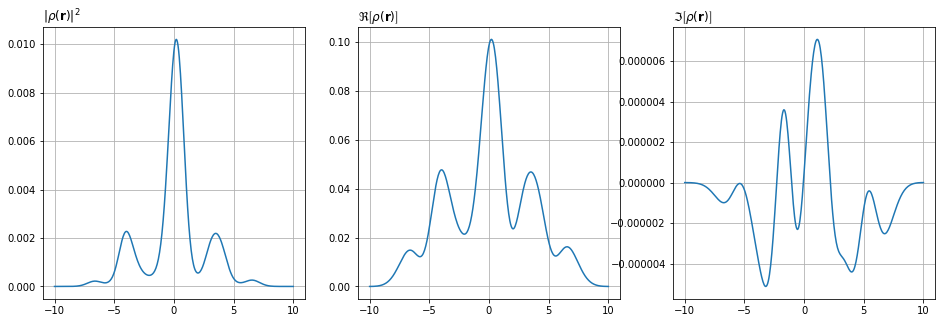

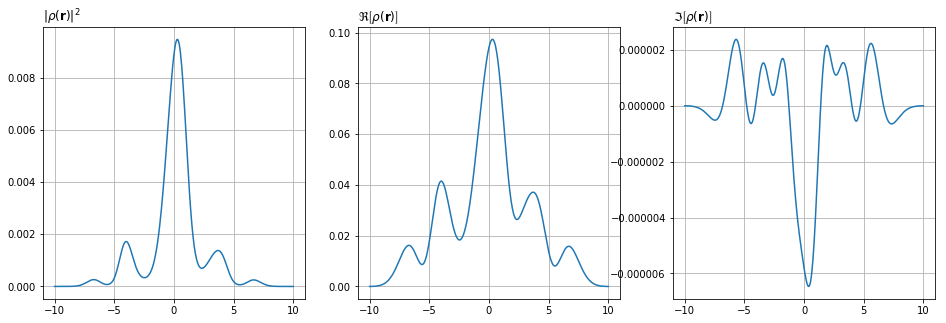

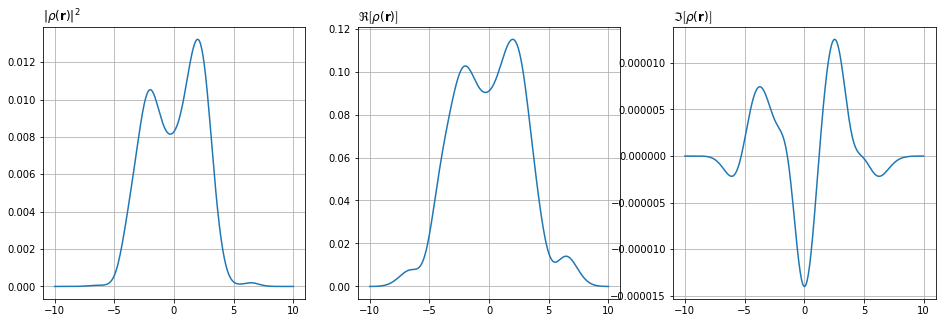

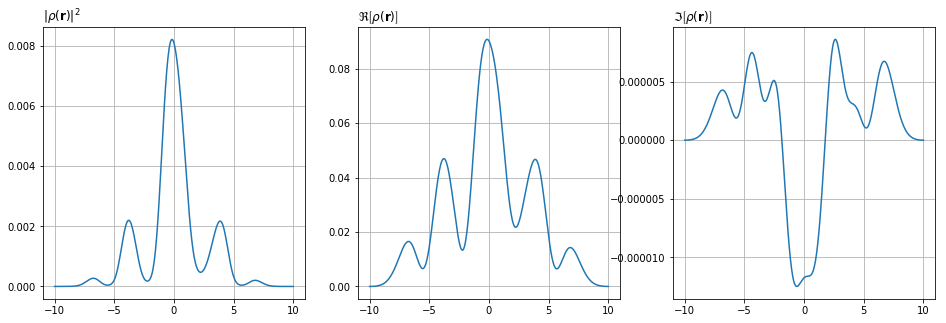

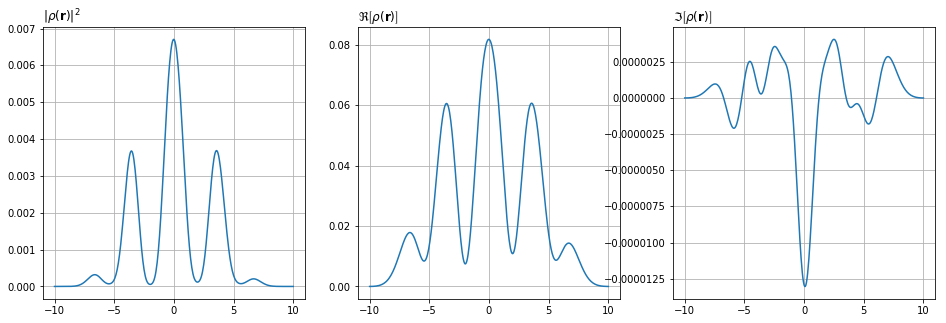

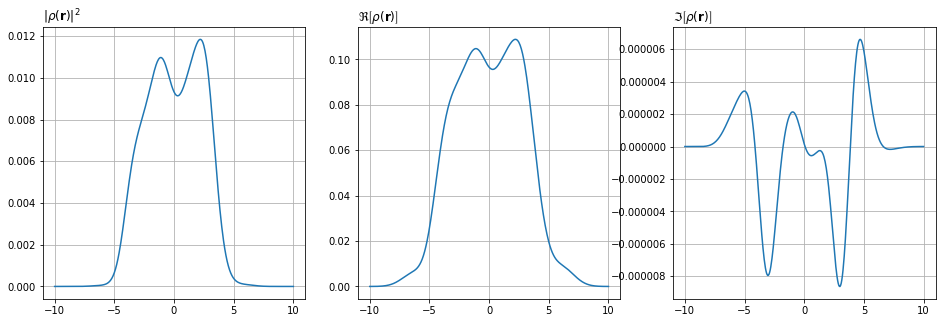

In [11]:
step_final = num_timesteps - 1
plot_step_freq = 100

for i, amp in enumerate(oatdccd.solve(time_points)):
    step = i + 1
    print(100 * " ", end="\r")
    print(f"step = {step} / {step_final}", end="\r")
    psi_overlap[i + 1] = oatdccd.compute_time_dependent_overlap()
    td_energies[i + 1] = oatdccd.compute_energy()

    if step % plot_step_freq == 0:
        rho = oatdccd.compute_particle_density()

        fig = plt.figure(figsize=(16, 5))

        ax = fig.add_subplot(1, 3, 1)
        ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
        plt.plot(odho.grid, np.abs(rho * rho.conj()))
        plt.grid()

        ax = fig.add_subplot(1, 3, 2)
        ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
        plt.plot(odho.grid, rho.real)
        plt.grid()

        ax = fig.add_subplot(1, 3, 3)
        ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
        plt.plot(odho.grid, rho.imag)
        plt.grid()

        plt.show()

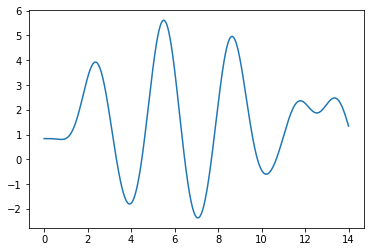

In [12]:
plt.plot(time_points, td_energies.real)
plt.show()